In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
try:
    df = pd.read_csv('dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: heart.csv not found. Please ensure the dataset is added correctly.")

Dataset loaded successfully.


In [3]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.72937

In [6]:
print("\n--- Check for Missing Values ---")
print(df.isnull().sum())


--- Check for Missing Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



--- Target Variable Distribution ---
target
1    165
0    138
Name: count, dtype: int64


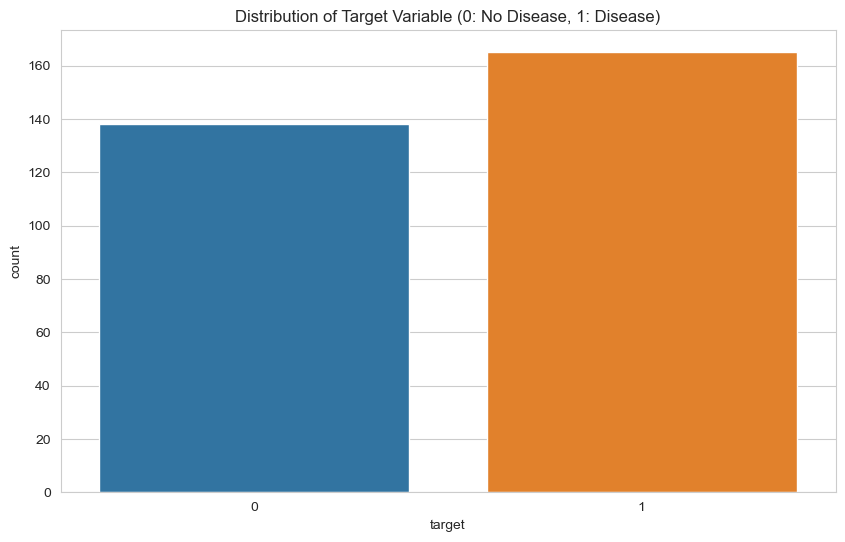

In [7]:
print("\n--- Target Variable Distribution ---")
target_counts = df['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

C:\Users\Aryaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


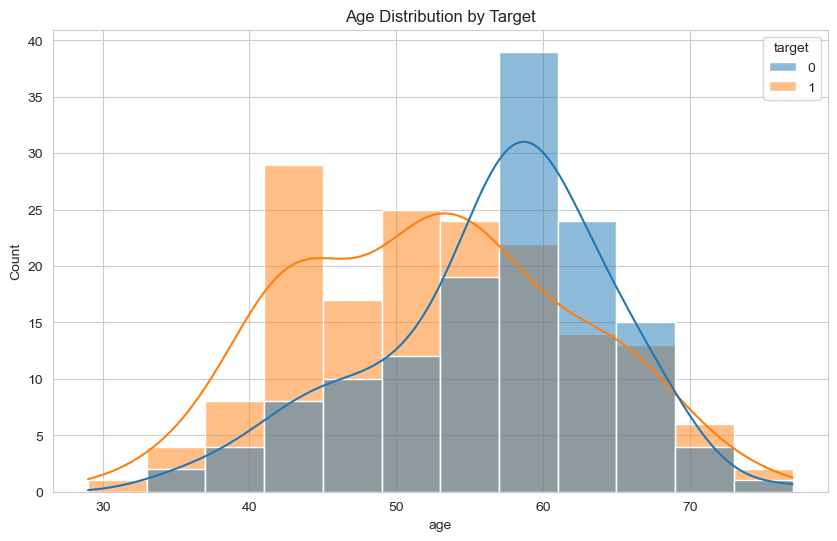

In [8]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Target')
plt.show()

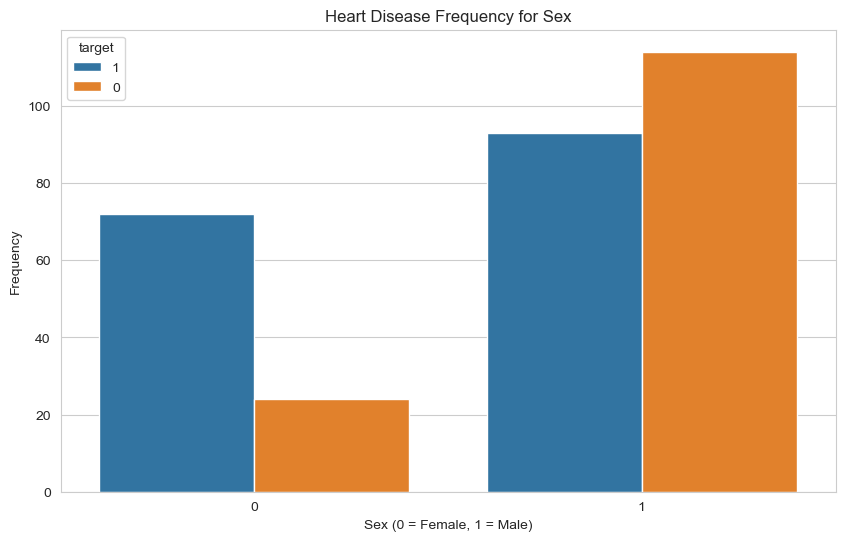

In [9]:
df['target'] = df['target'].astype(str)
sns.countplot(data=df, x='sex', hue='target')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()


--- Chest Pain Type (cp) Distribution: ---

0: Typical angina 
1: Atypical angina 
2: Non-anginal pain 
3: Asymptomatic


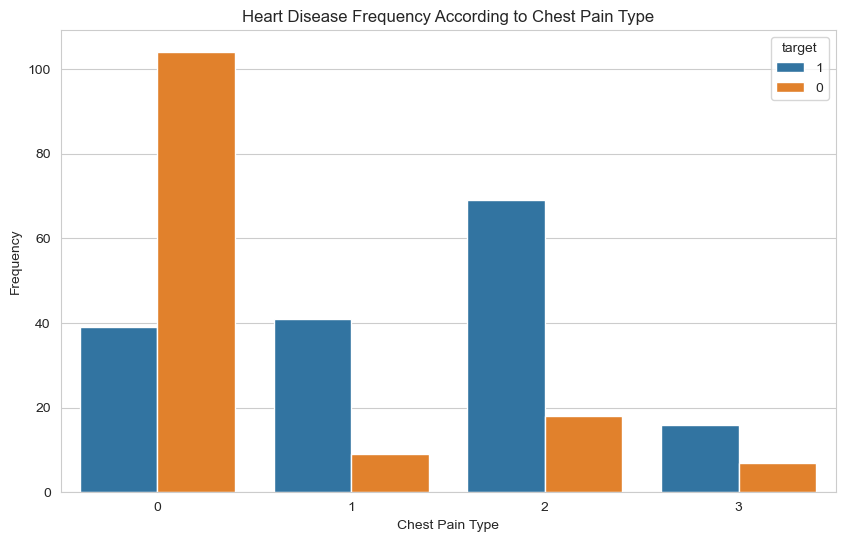

In [10]:
sns.countplot(data=df, x='cp', hue='target')
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
print("\n--- Chest Pain Type (cp) Distribution: ---")
print("\n0: Typical angina \n1: Atypical angina \n2: Non-anginal pain \n3: Asymptomatic")

plt.show()

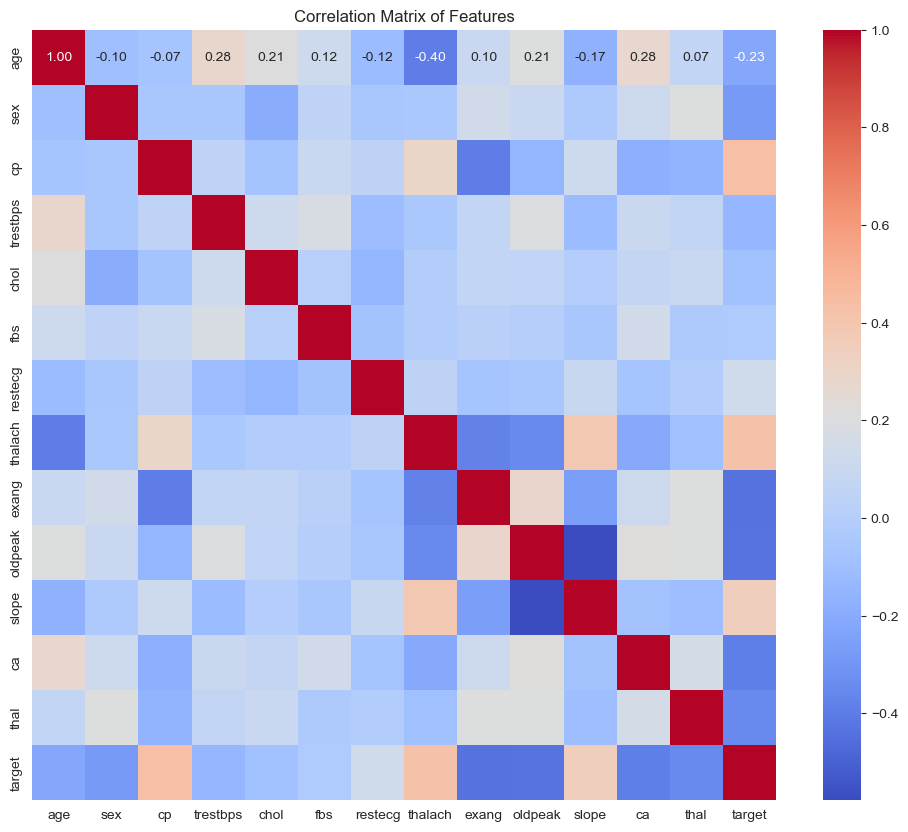

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal'] 
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (242, 13)
Test set shape: (61, 13)


In [16]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [17]:
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('passthrough', 'passthrough', ['sex', 'fbs', 'exang']) 
    ],
    remainder='drop' 
)

In [19]:
X_train_processed = preprocessor.fit_transform(X_train)

In [20]:
X_test_processed = preprocessor.transform(X_test)

In [21]:
feature_names_out = preprocessor.get_feature_names_out()
print(f"\nProcessed feature names ({X_train_processed.shape[1]} features):\n{feature_names_out}")


Processed feature names (27 features):
['num__age' 'num__trestbps' 'num__chol' 'num__thalach' 'num__oldpeak'
 'cat__cp_0' 'cat__cp_1' 'cat__cp_2' 'cat__cp_3' 'cat__restecg_0'
 'cat__restecg_1' 'cat__restecg_2' 'cat__slope_0' 'cat__slope_1'
 'cat__slope_2' 'cat__ca_0' 'cat__ca_1' 'cat__ca_2' 'cat__ca_3'
 'cat__ca_4' 'cat__thal_0' 'cat__thal_1' 'cat__thal_2' 'cat__thal_3'
 'passthrough__sex' 'passthrough__fbs' 'passthrough__exang']


In [22]:
print(f"\nProcessed Training set shape: {X_train_processed.shape}")
print(f"Processed Test set shape: {X_test_processed.shape}")


Processed Training set shape: (242, 27)
Processed Test set shape: (61, 27)


In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) 
}

In [24]:
results = {}

--- Training Logistic Regression ---

--- Results for Logistic Regression ---
Training Accuracy: 0.8719
Test Accuracy: 0.8852
Test ROC AUC: 0.9102
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Test Confusion Matrix:
 [[23  5]
 [ 2 31]]


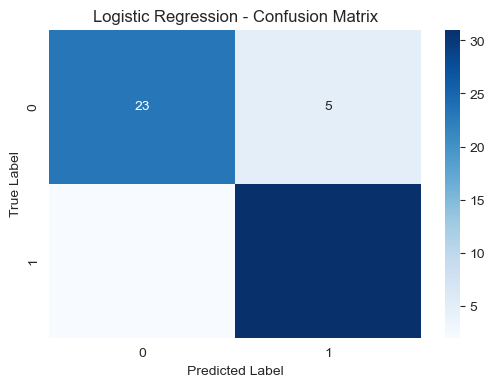

--- Training Random Forest ---

--- Results for Random Forest ---
Training Accuracy: 1.0000
Test Accuracy: 0.7869
Test ROC AUC: 0.9253
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

Test Confusion Matrix:
 [[19  9]
 [ 4 29]]


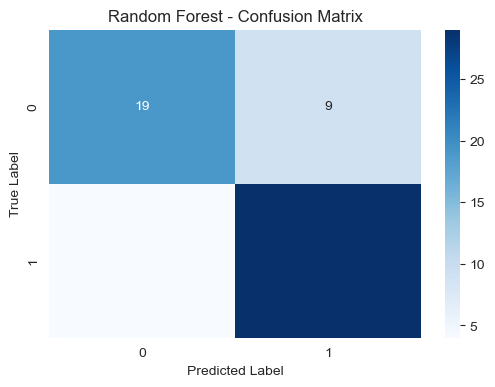

--- Training Support Vector Machine ---

--- Results for Support Vector Machine ---
Training Accuracy: 0.9256
Test Accuracy: 0.8197
Test ROC AUC: 0.9048
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Test Confusion Matrix:
 [[20  8]
 [ 3 30]]


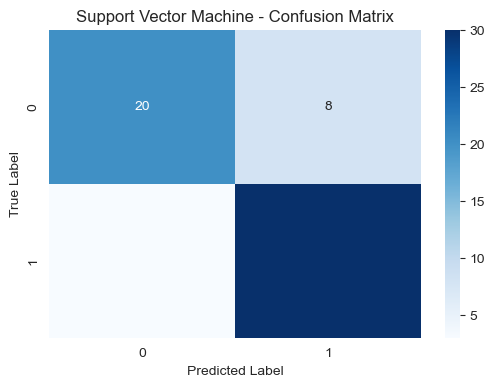

In [26]:
for name, model in models.items():
    print(f"--- Training {name} ---")
    
    model.fit(X_train_processed, y_train)
    
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    y_prob_test = model.predict_proba(X_test_processed)[:, 1] 
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_prob_test)

    results[name] = {
        "model": model,
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test,
        "classification_report": report_test,
        "confusion_matrix": cm_test,
        "roc_auc": roc_auc,
        "y_pred": y_pred_test,
        "y_prob": y_prob_test
    }
    print(f"\n--- Results for {name} ---")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    print("Test Classification Report:\n", report_test)
    print("Test Confusion Matrix:\n", cm_test)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [27]:
print("\n--- Model Comparison ---")
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        "Model": name,
        "Test Accuracy": result['accuracy_test'],
        "Test ROC AUC": result['roc_auc']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.sort_values(by='Test ROC AUC', ascending=False))


--- Model Comparison ---
                    Model  Test Accuracy  Test ROC AUC
1           Random Forest       0.786885      0.925325
0     Logistic Regression       0.885246      0.910173
2  Support Vector Machine       0.819672      0.904762


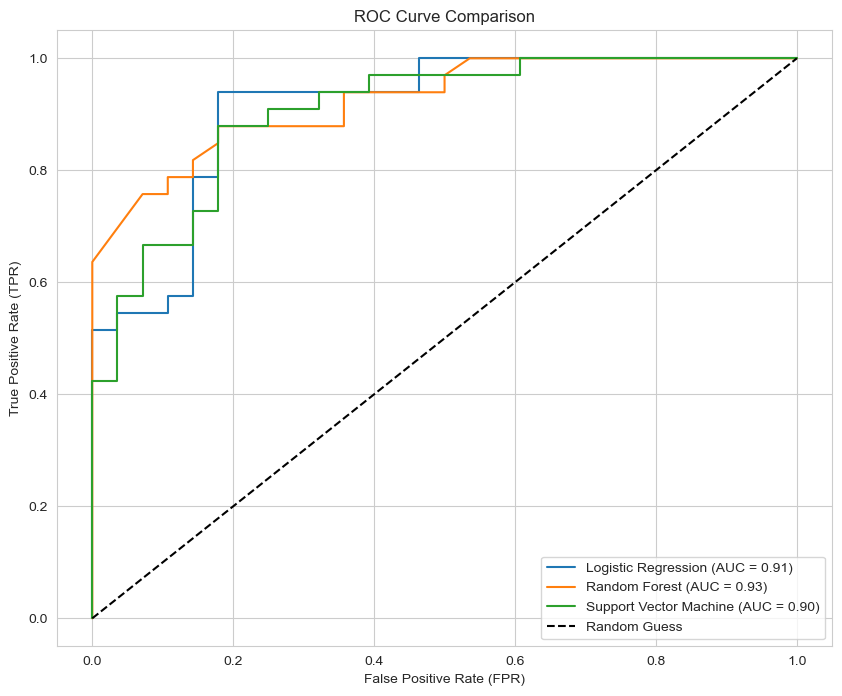

In [29]:
y_test = y_test.astype(int)
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()